In [188]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [2]:
transaction_df = pd.read_excel('QVI_transaction_data.xlsx')

In [3]:
purchase_df = pd.read_excel('Purchase_behaviour.xlsx')
purchase_df.drop('Unnamed: 0',inplace=True,axis=1,)

In [4]:
purchase_df = purchase_df.rename(columns=purchase_df.iloc[0])
purchase_df.drop(index=0,axis=0,inplace=True)

#### DATA CLEANING

In [5]:
transaction_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [282]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  int64         
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
 8   converted_date  264836 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 18.2+ MB


##### converting date to correct format

In [287]:
transaction_df['converted_date'] = pd.to_datetime(transaction_df['DATE'],origin='1899-12-30',unit='D')

In [288]:
transaction_df['converted_date']

0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: converted_date, Length: 264836, dtype: datetime64[ns]

##### EXtracting chips info

In [233]:
transaction_df_chips = transaction_df[transaction_df['PROD_NAME'].str.contains('chip',case=False)]
transaction_df_chips.nunique()


DATE                364
STORE_NBR           265
LYLTY_CARD_NBR    43625
TXN_ID            74438
PROD_NBR             33
PROD_NAME            33
PROD_QTY              5
TOT_SALES            40
converted_date      364
dtype: int64

Down to 33 different flavours of chips

In [245]:
distribution_by_name = (transaction_df_chips.groupby('PROD_NAME').agg({'TOT_SALES': 'sum'}).
                        sort_values(by='TOT_SALES',ascending=False)).head(10).reset_index()


t = distribution_by_name.PROD_NAME.tolist()
distribution_by_name

,PROD_NAME,TOT_SALES
0,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
1,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2
2,Doritos Corn Chips Cheese Supreme 170g,27183.2
3,Doritos Corn Chips Nacho Cheese 170g,26562.8
4,Tostitos Smoked Chipotle 175g,26474.8
5,Doritos Corn Chips Original 170g,26228.4
6,Doritos Corn Chip Mexican Jalapeno 150g,23887.5
7,Cobs Popd Sea Salt Chips 110g,23852.6
8,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,23772.8
9,Doritos Corn Chip Southern Chicken 150g,23735.4


In [246]:

distribution_by_qty = (transaction_df_chips.groupby('PROD_NAME').agg({'PROD_QTY': 'sum'}).sort_values(by='PROD_QTY',ascending=False)).reset_index()

distribution_by_qty = distribution_by_qty[distribution_by_qty.PROD_NAME.isin(t)]
distribution_by_qty.reset_index(drop='index',inplace=True)
distribution_by_qty

,PROD_NAME,PROD_QTY
0,Cobs Popd Sea Salt Chips 110g,6277
1,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,6256
2,Doritos Corn Chips Cheese Supreme 170g,6180
3,Smiths Crnkle Chip Orgnl Big Bag 380g,6164
4,Doritos Corn Chip Mexican Jalapeno 150g,6125
5,Smiths Crinkle Chips Salt & Vinegar 330g,6106
6,Doritos Corn Chip Southern Chicken 150g,6086
7,Doritos Corn Chips Nacho Cheese 170g,6037
8,Tostitos Smoked Chipotle 175g,6017
9,Doritos Corn Chips Original 170g,5961


In [250]:
transaction_df_chips['PRICE_PER_UNIT'] = transaction_df_chips['TOT_SALES'] / transaction_df_chips['PROD_QTY']

distribution_by_price = transaction_df_chips.drop_duplicates(subset='PROD_NAME', keep='first')[['PROD_NAME', 'PRICE_PER_UNIT']]
distribution_by_price = distribution_by_price[distribution_by_price.PROD_NAME.isin(t)]
distribution_by_price.reset_index(drop='index',inplace=True)
distribution_by_price

/var/folders/4n/gbrmm4bs17ldvh4_ypty4z5c0000gn/T/ipykernel_14548/1600876562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_df_chips['PRICE_PER_UNIT'] = transaction_df_chips['TOT_SALES'] / transaction_df_chips['PROD_QTY']


,PROD_NAME,PRICE_PER_UNIT
0,Smiths Crinkle Chips Salt & Vinegar 330g,5.7
1,Doritos Corn Chip Mexican Jalapeno 150g,3.9
2,Doritos Corn Chip Southern Chicken 150g,3.9
3,Doritos Corn Chips Original 170g,4.4
4,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,3.8
5,Cobs Popd Sea Salt Chips 110g,3.8
6,Doritos Corn Chips Cheese Supreme 170g,4.4
7,Smiths Crnkle Chip Orgnl Big Bag 380g,5.9
8,Doritos Corn Chips Nacho Cheese 170g,4.4
9,Tostitos Smoked Chipotle 175g,4.4


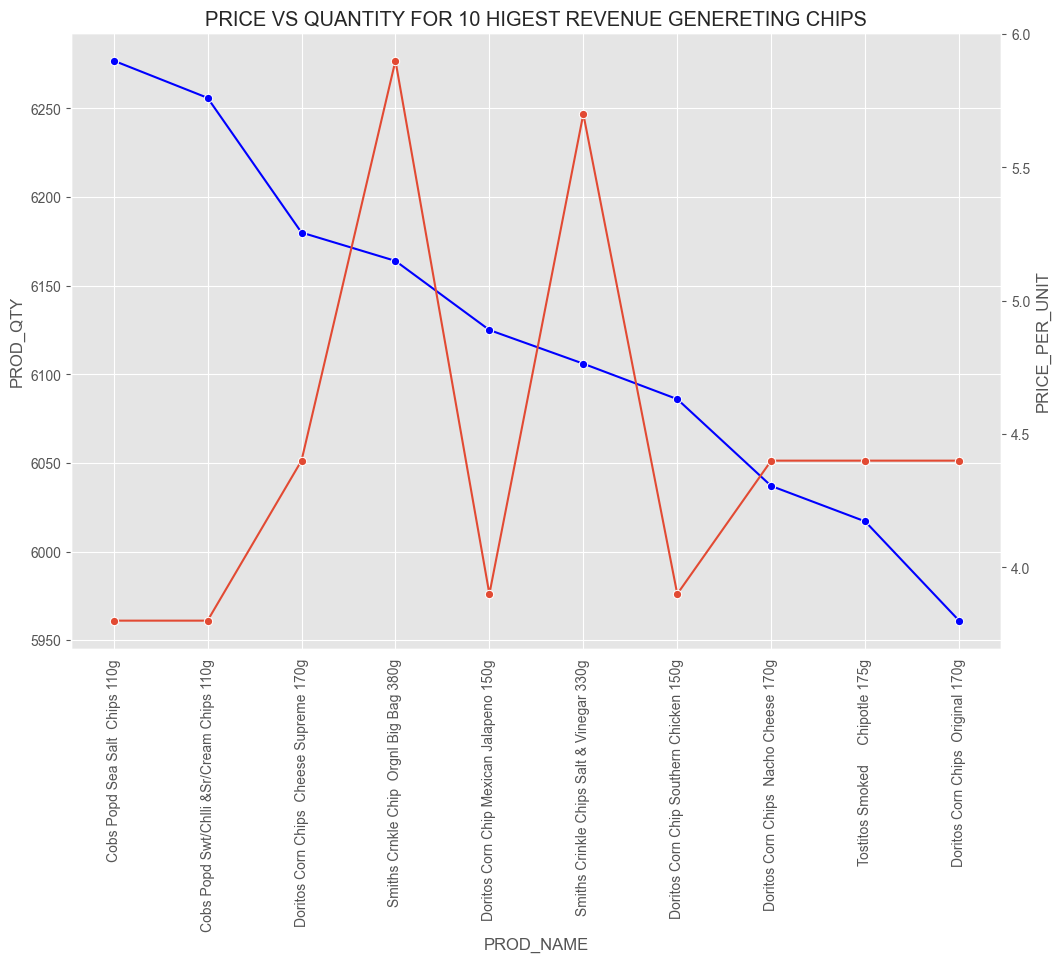

In [281]:
distribution = pd.merge(distribution_by_qty, distribution_by_price, on='PROD_NAME')

plt.figure(figsize=(12, 8))
ax = sns.lineplot(x='PROD_NAME', y='PROD_QTY', data=distribution,color='blue',marker='o')
sns.lineplot(x='PROD_NAME', y='PRICE_PER_UNIT', data=distribution, ax=ax.twinx(),marker='o')
plt.xticks(rotation=90)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
plt.grid(visible=False)
plt.title('PRICE VS QUANTITY FOR 10 HIGEST REVENUE GENERETING CHIPS')
plt.show()

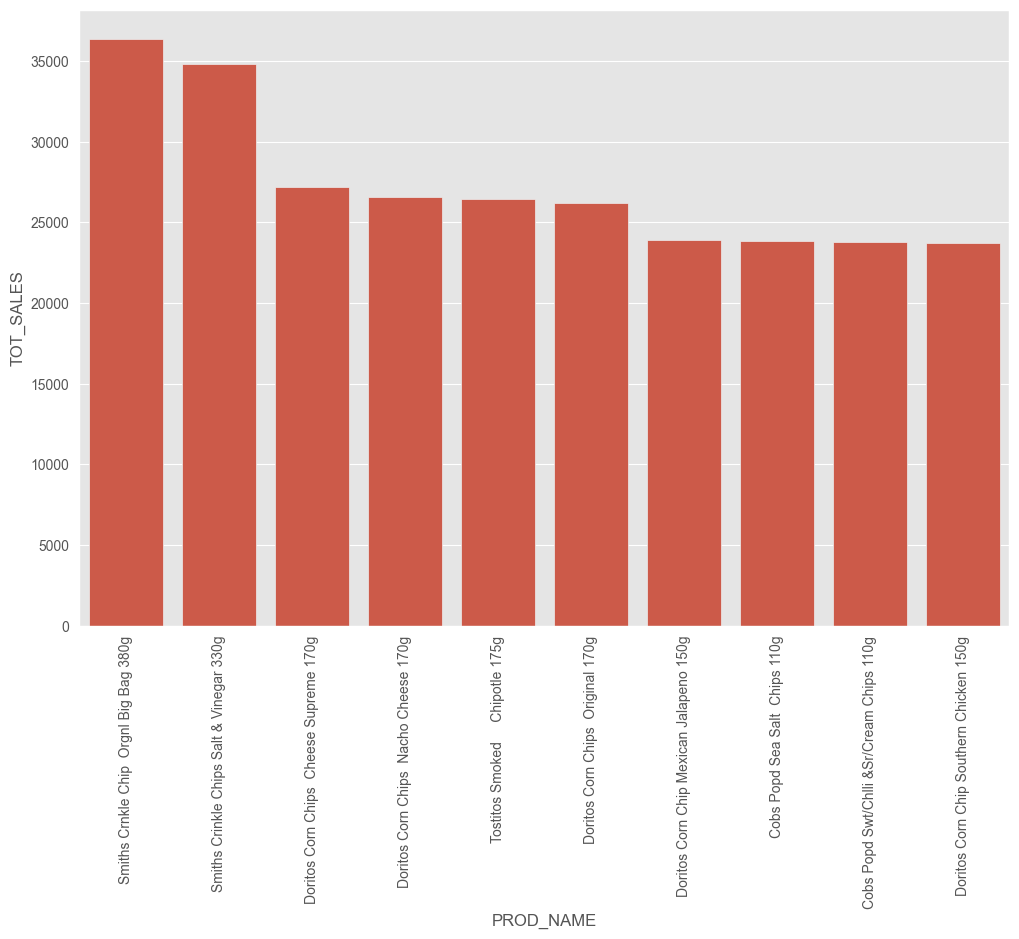

In [297]:
plt.figure(figsize=(12,8))
sns.barplot(x=distribution_by_name['PROD_NAME'],y=distribution_by_name['TOT_SALES'])
plt.xticks(rotation=90)
plt.show()

##### Extracting weights from each transaction

/var/folders/4n/gbrmm4bs17ldvh4_ypty4z5c0000gn/T/ipykernel_14548/946371355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_df_chips['weight'] = transaction_df_chips['PROD_NAME'].str.extract(r'(\d+)')
/var/folders/4n/gbrmm4bs17ldvh4_ypty4z5c0000gn/T/ipykernel_14548/946371355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_df_chips['weight'] = pd.to_numeric(transaction_df_chips['weight'], errors='coerce')


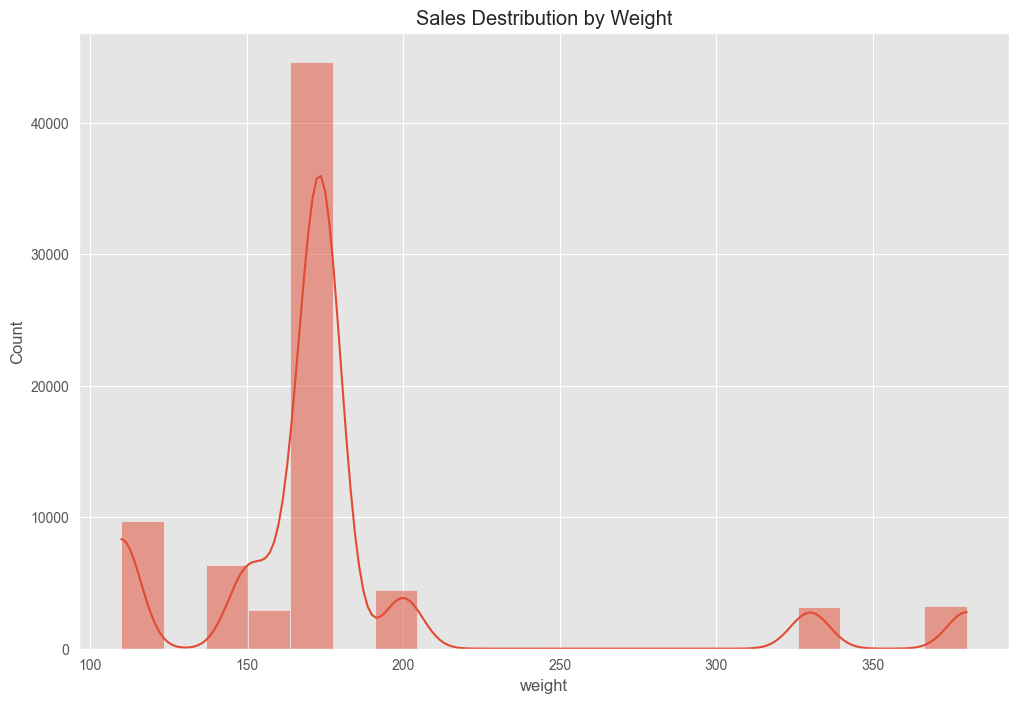

In [289]:
transaction_df_chips['weight'] = transaction_df_chips['PROD_NAME'].str.extract(r'(\d+)')
transaction_df_chips['weight'] = pd.to_numeric(transaction_df_chips['weight'], errors='coerce')

import seaborn as sns
plt.figure(figsize=(12,8))
sns.histplot(data=transaction_df_chips['weight'],kde=True,bins=20)
plt.title('Sales Destribution by Weight')
plt.show()



TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

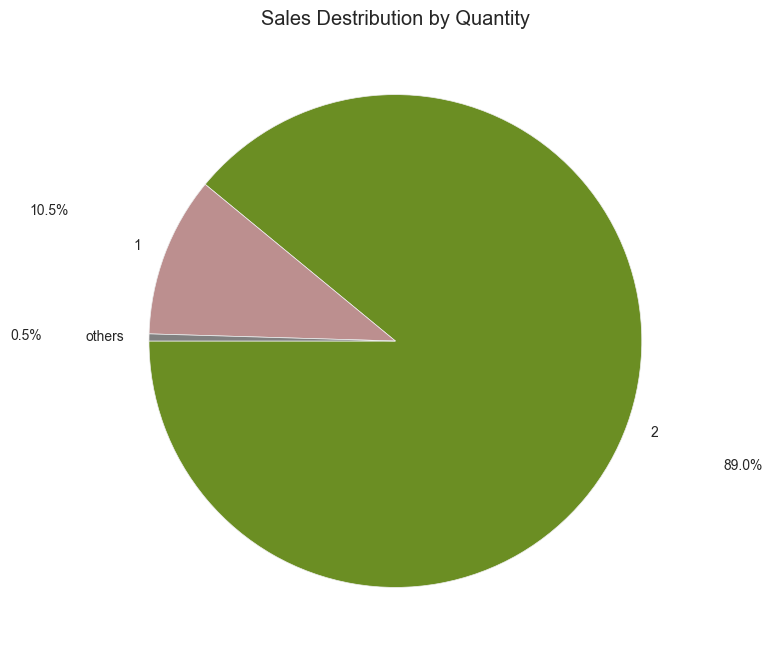

In [290]:
quantity_destribution = transaction_df_chips['PROD_QTY'].value_counts()
total= quantity_destribution.sum()


threshold = total*.05


small = quantity_destribution[quantity_destribution<threshold]
quantity_destribution_reduced = quantity_destribution[quantity_destribution >= threshold]
quantity_destribution_reduced['others'] = small.sum()


plt.figure(figsize=(12,8))
plt.pie(quantity_destribution_reduced,labels=quantity_destribution_reduced.index,
        autopct='%1.1f%%',startangle=180,pctdistance=1.5,
       colors = ['olivedrab', 'rosybrown', 'gray'])
plt.title('Sales Destribution by Quantity')
plt.axes('equal')

plt.show() 

In [291]:
transaction_df_chips

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,converted_date,PRICE_PER_UNIT,weight
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17,3.00,175
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20,1.45,170
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17,3.00,175
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,2019-05-16,5.70,330
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,2018-08-20,3.90,150
...,...,...,...,...,...,...,...,...,...,...,...
264815,43408,271,271193,269365,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,2018-11-04,3.80,110
264816,43614,271,271193,269366,75,Cobs Popd Sea Salt Chips 110g,2,7.6,2019-05-29,3.80,110
264826,43549,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6,2019-03-25,3.80,110
264830,43416,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6,2018-11-12,3.30,175
